In [3]:
import numpy as np
import pandas as pd

In [2]:
data = np.array([[80, 60, 50],  
    [150, 100, 100],
    [135, 100, 80],
    [165, 120, 100],
    [95, 70, 60],
    [130, 90, 80],
    [110, 80, 70]])
dataset = pd.DataFrame({'B':data[0,:],'C':data[1,:],'D':data[2,:],'E':data[3,:],'F':data[4,:],'G':data[5,:],'H':data[6,:]})
dataset.rename(index={0:'Q',1:'L',2:'K'}, inplace=True)
print(dataset)
print(dataset.T)

    B    C    D    E   F    G    H
Q  80  150  135  165  95  130  110
L  60  100  100  120  70   90   80
K  50  100   80  100  60   80   70
     Q    L    K
B   80   60   50
C  150  100  100
D  135  100   80
E  165  120  100
F   95   70   60
G  130   90   80
H  110   80   70


In [4]:
data_mean = dataset.T.mean()
data_std = dataset.T.std()
data_median = dataset.T.median()
data_var = dataset.T.var()

In [5]:
print(data_mean)

Q    123.571429
L     88.571429
K     77.142857
dtype: float64


In [6]:
print(data_var)

Q    914.285714
L    414.285714
K    357.142857
dtype: float64


In [7]:
print(data_std)

Q    30.237158
L    20.354010
K    18.898224
dtype: float64


In [8]:
print(data_median)

Q    130.0
L     90.0
K     80.0
dtype: float64


In [9]:
import matplotlib.pyplot as plt
plt.hist(dataset.T['Q'])
plt.hist(dataset.T['L'])

(array([1., 1., 0., 1., 0., 1., 2., 0., 0., 1.]),
 array([ 60.,  66.,  72.,  78.,  84.,  90.,  96., 102., 108., 114., 120.]),
 <a list of 10 Patch objects>)

(array([1., 1., 0., 1., 0., 1., 2., 0., 0., 1.]),
 array([ 60.,  66.,  72.,  78.,  84.,  90.,  96., 102., 108., 114., 120.]),
 <a list of 10 Patch objects>)

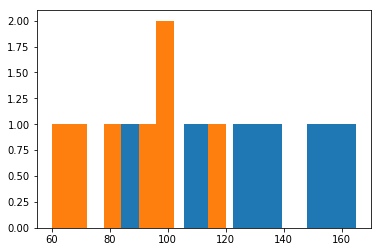

In [10]:
plt.hist(dataset.T['Q'])
plt.hist(dataset.T['L'])

In [11]:
log_df = np.log(dataset.T)

In [12]:
log_df

,Q,L,K
B,4.382027,4.094345,3.912023
C,5.010635,4.605170,4.605170
D,4.905275,4.605170,4.382027
E,5.105945,4.787492,4.605170
F,4.553877,4.248495,4.094345
G,4.867534,4.499810,4.382027
H,4.700480,4.382027,4.248495


In [13]:
X = log_df[['L','K']]
Y = log_df['Q']

In [14]:
X

,L,K
B,4.094345,3.912023
C,4.605170,4.605170
D,4.605170,4.382027
E,4.787492,4.605170
F,4.248495,4.094345
G,4.499810,4.382027
H,4.382027,4.248495


In [15]:
Y

B    4.382027
C    5.010635
D    4.905275
E    5.105945
F    4.553877
G    4.867534
H    4.700480
Name: Q, dtype: float64

In [16]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
regr = linear_model.LinearRegression()
model = regr.fit(X, Y)

In [18]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 0.14623321175616866
Coefficients: 
 [0.54842747 0.50874094]


In [19]:
model = smf.ols(formula = 'Q ~ L+K', data = log_df).fit()
model.summary()

NameError: name 'smf' is not defined

In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [21]:
model = smf.ols(formula = 'Q ~ L+K', data = log_df).fit()
model.summary()

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Q   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Thu, 16 May 2019   Prob (F-statistic):           4.34e-06
Time:                        17:55:22   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1462      0.114      1.282      0.269      -0.170       0.463
L              0.5484      0.090      6.127      0.004       0.300       0.797
K              0.5087      0.083      6.150      0.004       0.279       0.738
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.801
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.261
Skew:                           1.352   Prob(JB):                        0.323
Kurtosis:                       3.665   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
Y_pred = model.predict(X)
residual = Y.values-Y_pred
residual

B    0.000136
C   -0.004038
D    0.004123
E   -0.008718
F   -0.005309
G    0.024166
H   -0.010360
dtype: float64

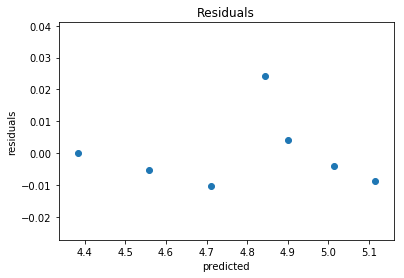

In [23]:
plt.scatter(Y_pred,residual)
plt.title(("Residuals"))
plt.xlabel('predicted')
plt.ylabel('residuals')
plt.show()

In [24]:
def r2(y_true, y_pred):
    sse  = np.square( y_pred - y_true ).sum()
    sst  = np.square( y_true - y_true.mean() ).sum()
    return 1 - sse/sst

In [25]:
R2 = r2(Y,Y_pred)
p = 2
n = 7
Adj_R2 = 1-(1-R2)*(n-1)/(n-p-1)
print('Adjusted R squared calculated using formula: ', Adj_R2)

Adjusted R squared calculated using formula:  0.9968763418198051
